# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | barra
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | adiake
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | sechura
Processing Record 11 of Set 1 | labytnangi
Processing Record 12 of Set 1 | langxiang
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | rukban
City not found. Skipping...
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | newman
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | port saint john's
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,58.73,88,90,1.01,AU,1715224409
1,sitka,57.0531,-135.3300,46.29,81,100,8.05,US,1715224409
2,barra,-11.0894,-43.1417,73.13,75,0,2.77,BR,1715224409
3,tual,-5.6667,132.7500,83.14,76,52,15.68,ID,1715224410
4,manokwari,-0.8667,134.0833,80.92,85,97,1.57,ID,1715224410


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,58.73,88,90,1.01,AU,1715224409
1,sitka,57.0531,-135.3300,46.29,81,100,8.05,US,1715224409
2,barra,-11.0894,-43.1417,73.13,75,0,2.77,BR,1715224409
3,tual,-5.6667,132.7500,83.14,76,52,15.68,ID,1715224410
4,manokwari,-0.8667,134.0833,80.92,85,97,1.57,ID,1715224410


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

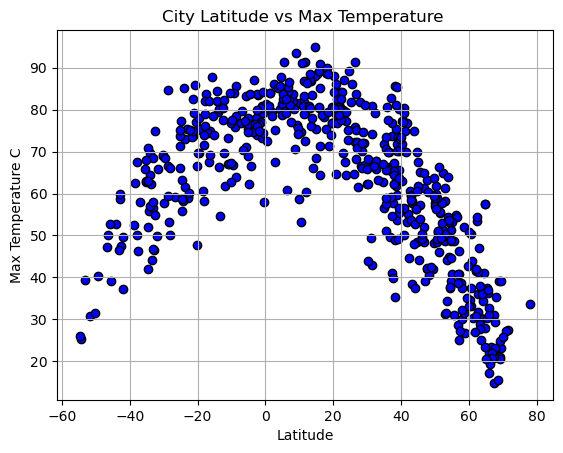

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.title(f"City Latitude vs Max Temperature ")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

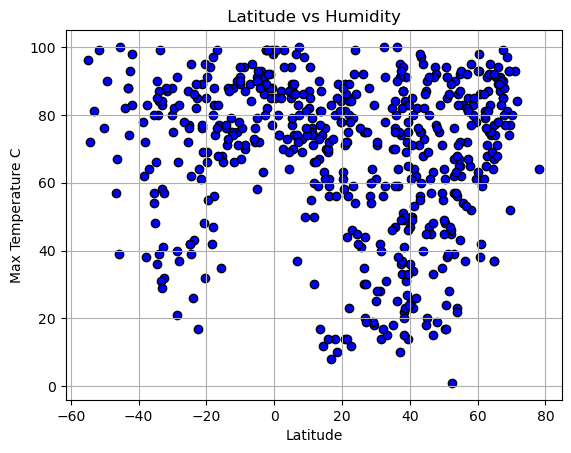

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.title(f" Latitude vs Humidity ")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()





#### Latitude Vs. Cloudiness

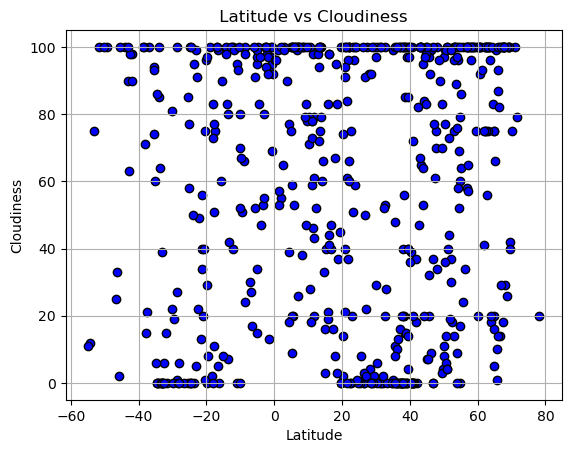

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="b" , edgecolor="k")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f" Latitude vs Cloudiness ")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

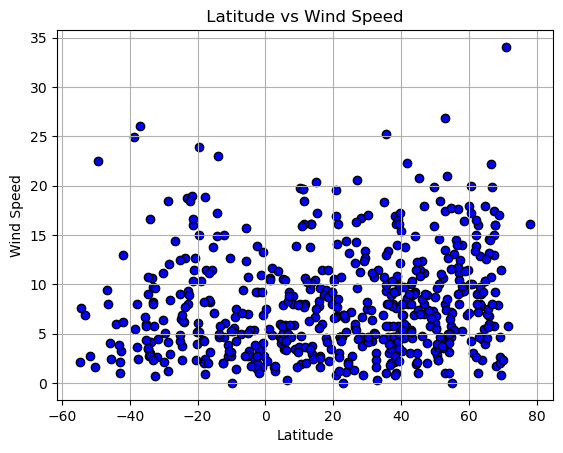

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="b" , edgecolor="k")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f" Latitude vs Wind Speed ")
plt.grid()
plt.style.use('fast')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(parameter_1, parameter_2, text_x=0.05, text_y=0.1):
    slope, intercept = np.polyfit(parameter_1, parameter_2, 1)
    r_value = np.corrcoef(parameter_1, parameter_2)[0, 1]

    plt.scatter(parameter_1, parameter_2)
    regression_line = slope * np.array(parameter_1) + intercept
    plt.plot(parameter_1, regression_line, color='red')

    plt.title('Linear Regression Plot')
    plt.xlabel('X')
    plt.ylabel('Y')

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_x, text_y, equation, ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=14, fontweight='normal', color='red')

    print(f'r-value: {r_value:.2f}')

    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,46.29,81,100,8.05,US,1715224409
5,adiake,5.2863,-3.3040,80.33,88,100,4.14,CI,1715224410
8,st. john's,47.5649,-52.7093,41.94,94,61,4.00,CA,1715224168
10,labytnangi,66.6572,66.4183,21.38,91,100,22.24,RU,1715224410
11,langxiang,46.9500,128.8833,61.23,15,0,11.12,CN,1715224411


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,58.73,88,90,1.01,AU,1715224409
2,barra,-11.0894,-43.1417,73.13,75,0,2.77,BR,1715224409
3,tual,-5.6667,132.7500,83.14,76,52,15.68,ID,1715224410
4,manokwari,-0.8667,134.0833,80.92,85,97,1.57,ID,1715224410
6,invercargill,-46.4000,168.3500,50.02,67,33,8.01,NZ,1715224410


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.86


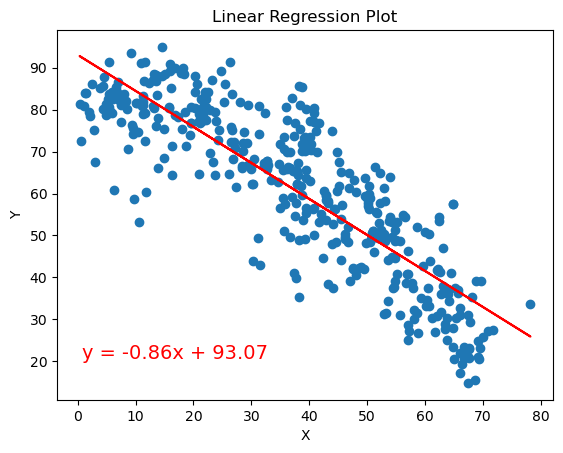

In [33]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat'] 
y = northern_hemi_df['Max Temp']
create_linear_regression_plot(x,y)

r-value: 0.75


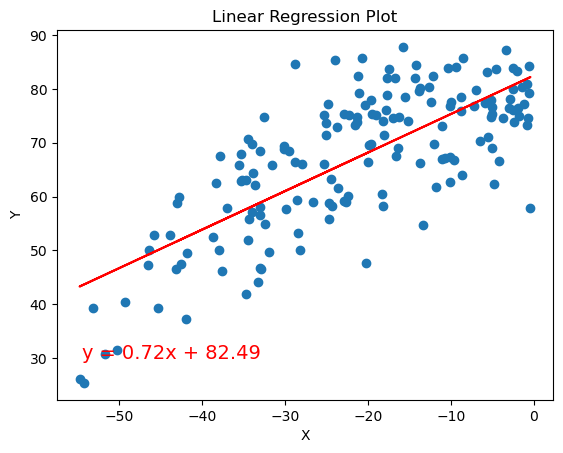

In [30]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat'] 
y = southern_hemi_df['Max Temp']
create_linear_regression_plot(x,y)

**Discussion about the linear relationship:** My ideal location based on linear regression plot is being as close to the equator as possible. +20 of equarter peaks.

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.03


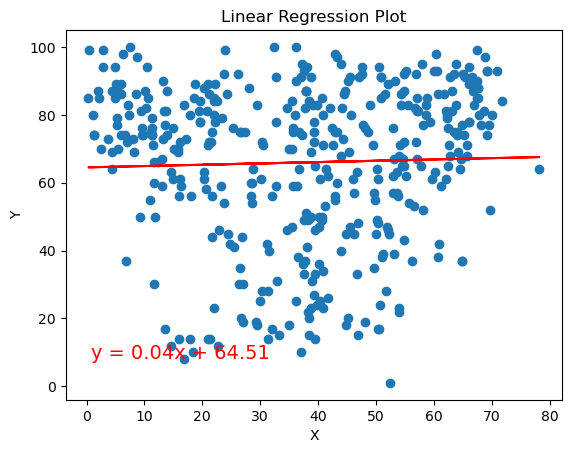

In [34]:
# Northern Hemisphere
x = northern_hemi_df['Lat'] 
y = northern_hemi_df['Humidity']
create_linear_regression_plot(x,y)

r-value: 0.23


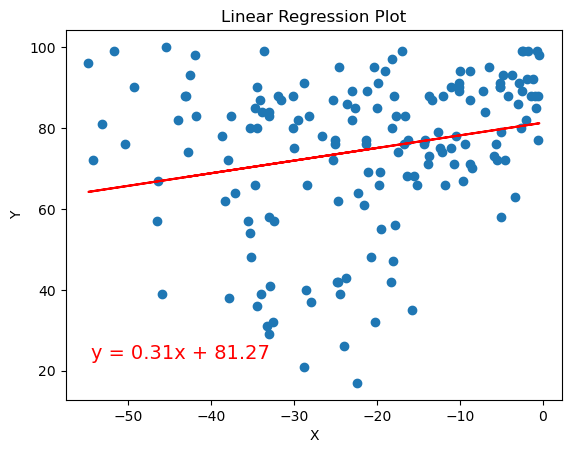

In [35]:
# Southern Hemisphere
x = southern_hemi_df['Lat'] 
y = southern_hemi_df['Humidity']
create_linear_regression_plot(x,y)

**Discussion about the linear relationship:** humidity does not show coorlation with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x = northern_hemi_df['Lat'] 
y = northern_hemi_df['Cloudiness']
create_linear_regression_plot(x,y)

In [ ]:
# Southern Hemisphere
x = southern_hemi_df['Lat'] 
y = southern_hemi_df['Cloudiness']
create_linear_regression_plot(x,y)

**Discussion about the linear relationship:** cloudiness does not show coorlation with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.17


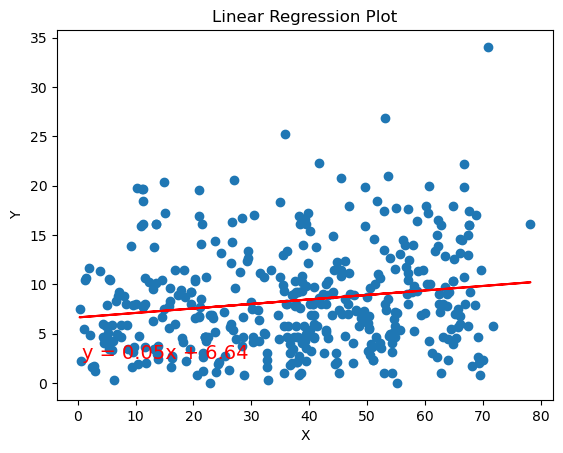

In [37]:
# Northern Hemisphere
x = northern_hemi_df['Lat'] 
y = northern_hemi_df['Wind Speed']
create_linear_regression_plot(x,y)

r-value: -0.06


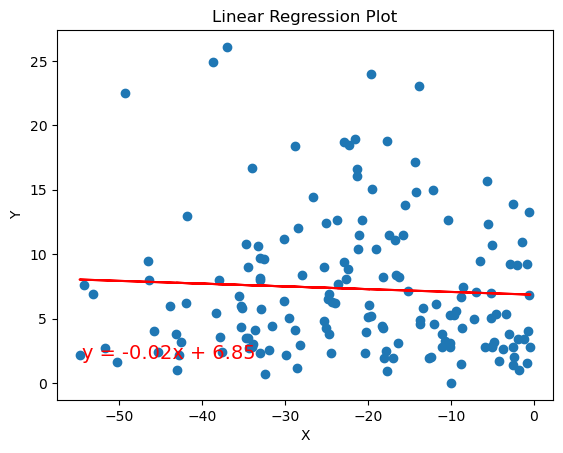

In [36]:
# Southern Hemisphere
x = southern_hemi_df['Lat'] 
y = southern_hemi_df['Wind Speed']
create_linear_regression_plot(x,y)

**Discussion about the linear relationship:** wind speed increases as we move away from equarter.